<p style="text-align: right;"> © 2019 Data Guardians </p>

# Good Game; Well-Played?

 <i><a href="https://www.ftwfoundation.org/games">The Makings of a Successful Videogame </a></i>

---

<b> Background: </b> The Gaming industry is currently one of the fastest rising markets in the world, with 134.9 billion dollars annual total revenue reported in 2018 worldwide and expected to generate 152.1 billion dollars by the end of 2019, according to <i> Gamesindustry.biz</i>. 

   With gaming intertwined with the pop culture and seems to be going nowhere with its rise and with going online adding fuel to the advancement of the field, it's the best time to create games. Whether you are in a start-up company, an indie game developer or from a big gaming company, it's always an inevitable question of what games will skyrocket to the top and receive a legendary Super Mario like status, or games that will survive in the market, despite its uncertainty of longevity and time. Creating games and apps is no easy task, especially it uses up resources and once released, time will tell of its peak or spotlight. And this is where the project comes in. 
   
   This Games Analysis is created to be able to help start-ups and gaming enthusiasts, especially those starting in game development, to identify the factors critical to the game's success in the online gaming platform, such as Steam. With the insights gathered, this could help them in creating a perfect formula of what games would profit them more and most likely to be played by the certain community. 
   
   With creativity, skills, talent and esp. a wise and data-backed up study, a game will surely catch everyone's interest.

**Dataset and Their Data Dictionary:** 

From the original <a href="https://academictorrents.com/details/eba3b48fcdaa9e69a927051f1678251a86a546f3"> 180gb dataset from the Internet</a> , the records that were able to be extracted completely:

* Achievement_Percentages
* App_ID_Info
* Games_Developers
* Games_Genres
* Games_Publishers

**Achievement_Percentages**

It contains achievement completion data for all the products listed in the App_ID_Info table:

   * **appid:** The ID of the game in question
   * **Name:** Name of the achievement as it appears to players. As an internal value assigned by developers, its descriptiveness of the achievement varies.
   * **Percentage:** Percentage of players who have finished this achievement out of all total players who own this game.

**App_ID_Info**

It contains selected information for each product ("app") offered on Steam.

   * **appid:** The ID of the "app" in question, which is not necessarily a game.
   * **Title:** Title of the app, as it appears to users
   * **Type:** The type of the "app"
   * **Price:** The current price of the "app" on the Steam storefront, in US dollars
   * **Release_Date:** The date the "app" was made available via the Steam storefront.
   * **Rating:** The rating of the "app" on Metacritic
   * **Required_Age:** MSRB or PEGI-assigned age requirement for viewing this game in the Steam storefront, and, by extension, clicking the button to purchase it.
   * **Is_Multiplayer:** Value of either 0 or 1 indicating whether or not an "app" contains multiplayer content. Self-reported by developers.

**Game_Developers**

It contains the names of the developers for each product on Steam. This is a sister table to App_ID_Info.

   * **appid:** ID of the "app" in question.
   * **Developer:** Developer of the app in question. Note that some apps have multiple developers and thus numerous distinct rows with the same appid are possible.

**Games_Genres**

It contains the names of the genres for each product on Steam. This is a sister table to App_ID_Info. 

   * **appid:** ID of the "app" in question.
   * **Genre:** A genre of the app in question. Note that most apps have multiple genres and thus numerous distinct rows with the same appid are possible.


**Games_Publishers**

It contains the names of the publishers for each product on Steam. This is a sister table to App_ID_Info. 

   * **appid:** ID of the "app" in question.
   * **Publisher:** A publisher of the app in question. Note that some apps have multiple publishers and thus numerous distinct rows with the same appid are possible.

   

Data has been cleaned through Excel, OpenRefine and Jupyter Notebook. 
Final Dataset merges all of the dataset, with shared app_id and Some features have been turned to machine-readable input (1, 0) such as:

* Genre - separated into each Genre with (1,0) as input such as Genre_Accounting

**Feature Engineering**:

Some features were created such as:

* Free_or_Priced- Games priced at 0 = free
* High_Priced_or_Not- Games priced at 10 USD above are considered high-priced

* Release_Date- Splits based on month, year, and season, Month / Year / Season; Values: (1-12); (0000-2019); (1-4)





## Importing Libraries

### Standard Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

##### Data Preparation

In [3]:
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##### For Clustering Algorithms

In [4]:
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

##### For Classification (Validation)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn import tree, metrics

##### Metrics

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

##### Ensemble Models

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

## Exploratory Data Analysis (EDA)

EDA is done to get a grasp on what the dataset is all about. These also involves the following steps:

* Checking the shape of dataset
* Checking if both datasets share the same CustomerID to be able to merge easily 
(assuming that it is raw and still needs to be checked) 
* Changing dataset into machine-readable

In this dataset, data cleaning was done through various methods (MS Excel, Google Sheets, OpenRefine, and Jupyter Notebook). This dataset have been obtained from the internet scraped by researchers as already available, but the given dataset needs to be cleaned since it may have redundant values and null values, and unreadable characters.


### Loading and Initial Exploration of the Dataset

In [8]:
#Viewing a sample of the data to check if it is loaded properly and to get a grasp what the data is all about
df = pd.read_csv("final_dataset_appended_and_all_v1.csv", index_col="App_ID")

In [9]:
#Checking the descriptive statistics of the dataset
df.head()

,Title,Type,Price,Free_or_paid,High_priced,Release_Date,Release_Day,Release_Month,Release_Year,Release_Spring,...,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Developer,Publisher,Cluster_Label
App_ID,,,,,,,,,,,,,,,,,,,,,
220,Half-Life 2,game,9.99,1,0,11/16/2004,16,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
240,Counter-Strike: Source,game,19.99,1,1,11/01/2004,1,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
300,Day of Defeat: Source,game,9.99,1,0,07/12/2010,12,7,2010,0,...,0,0,0,0,0,1,1,Valve,Valve,0
380,Half-Life 2: Episode One,game,7.99,1,0,06/01/2006,1,6,2006,0,...,0,0,0,0,0,1,1,Valve,Valve,0
400,Portal,game,9.99,1,0,10/10/2007,10,10,2007,0,...,0,0,0,0,0,1,1,Valve,Valve,1


In [10]:
#Checking the descriptive statistics of the dataset
df.describe(include="all")

,Title,Type,Price,Free_or_paid,High_priced,Release_Date,Release_Day,Release_Month,Release_Year,Release_Spring,...,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Developer,Publisher,Cluster_Label
count,1230,1230,1230.000000,1230.000000,1230.000000,1230,1230.000000,1230.000000,1230.000000,1230.000000,...,1230.0,1230.0,1230.0,1230.0,1230.0,1230.000000,1230.000000,836,841,1230.000000
unique,1223,1,NaN,NaN,NaN,795,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606,426,NaN
top,Call of Duty®: Ghosts,game,NaN,NaN,NaN,9/18/2014,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Valve,Paradox Interactive,NaN
freq,2,1230,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,24,NaN
mean,NaN,NaN,16.032585,0.959350,0.558537,NaN,16.460976,6.430081,2013.121951,0.278862,...,0.0,0.0,0.0,0.0,0.0,0.694309,0.694309,NaN,NaN,0.743089
std,NaN,NaN,11.398713,0.197559,0.496764,NaN,8.656055,3.338447,3.155801,0.448622,...,0.0,0.0,0.0,0.0,0.0,0.460887,0.460887,NaN,NaN,0.842724
min,NaN,NaN,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1970.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,9.990000,1.000000,0.000000,NaN,9.000000,3.000000,2012.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,0.000000
50%,NaN,NaN,14.990000,1.000000,1.000000,NaN,17.000000,7.000000,2014.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,NaN,NaN,0.000000
75%,NaN,NaN,19.990000,1.000000,1.000000,NaN,24.000000,9.000000,2015.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,NaN,NaN,2.000000


In [11]:
#Checking the features and its column names, datatypes, null values, and counts 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 220 to 441680
Data columns (total 45 columns):
Title                          1230 non-null object
Type                           1230 non-null object
Price                          1230 non-null float64
Free_or_paid                   1230 non-null int64
High_priced                    1230 non-null int64
Release_Date                   1230 non-null object
Release_Day                    1230 non-null int64
Release_Month                  1230 non-null int64
Release_Year                   1230 non-null int64
Release_Spring                 1230 non-null int64
Release_Summer                 1230 non-null int64
Release_Fall                   1230 non-null int64
Release_Winter                 1230 non-null int64
Rating                         1230 non-null int64
Game_Rating                    1230 non-null object
Achievement_Percentage         1230 non-null float64
Required_Age                   1230 non-null int64
Is_Multiplayer

In [12]:
#Checking the dimensions of the dataset
df.shape

(1230, 45)

In [13]:
#Checking the datatypes of the dataset
df.dtypes

Title                           object
Type                            object
Price                          float64
Free_or_paid                     int64
High_priced                      int64
Release_Date                    object
Release_Day                      int64
Release_Month                    int64
Release_Year                     int64
Release_Spring                   int64
Release_Summer                   int64
Release_Fall                     int64
Release_Winter                   int64
Rating                           int64
Game_Rating                     object
Achievement_Percentage         float64
Required_Age                     int64
Is_Multiplayer                   int64
Genre_Action                     int64
Genre_Free to Play               int64
Genre_Strategy                   int64
Genre_Adventure                  int64
Genre_Indie                      int64
Genre_RPG                        int64
Genre_Animation & Modeling       int64
Genre_Video Production   

In [14]:
#Checking if there are duplicated values
df.duplicated().value_counts()

False    1230
dtype: int64

### Splitting Categorical Variables from Numerical Variables
To be able to clean the data properly and for easier convenience, one of the steps was to separate the categorical and numerical features. 

In [15]:
#Categorical Features Only
df_cat = df.select_dtypes(include=['object'])

#Numerical Features Only
df_num = df.select_dtypes(include=['int64','float64'])

In [16]:
#Checking the shape of the categorical features
df_cat.shape

(1230, 6)

In [17]:
#Checking the descriptive statistics of the features
df_cat.describe(include='object')

,Title,Type,Release_Date,Game_Rating,Developer,Publisher
count,1230,1230,1230,1230,836,841
unique,1223,1,795,4,606,426
top,Call of Duty®: Ghosts,game,9/18/2014,High,Valve,Paradox Interactive
freq,2,1230,6,758,13,24


In [18]:
#Checking the shape of the numerical features
df_num.shape

(1230, 39)

In [19]:
#Checking the descriptive statistics of the features
df_num.describe()

,Price,Free_or_paid,High_priced,Release_Day,Release_Month,Release_Year,Release_Spring,Release_Summer,Release_Fall,Release_Winter,...,Genre_Utilities,Genre_Design & Illustration,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Cluster_Label
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,...,1230.0,1230.0,1230.0,1230.0,1230.0,1230.0,1230.0,1230.000000,1230.000000,1230.000000
mean,16.032585,0.959350,0.558537,16.460976,6.430081,2013.121951,0.278862,0.219512,0.307317,0.194309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.694309,0.694309,0.743089
std,11.398713,0.197559,0.496764,8.656055,3.338447,3.155801,0.448622,0.414085,0.461570,0.395829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.460887,0.460887,0.842724
min,0.000000,0.000000,0.000000,1.000000,1.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,9.990000,1.000000,0.000000,9.000000,3.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,14.990000,1.000000,1.000000,17.000000,7.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000
75%,19.990000,1.000000,1.000000,24.000000,9.000000,2015.000000,1.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,2.000000
max,99.990000,1.000000,1.000000,31.000000,12.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,2.000000


In [20]:
df_new =df.copy()

In [21]:
df_new.dropna(how='all', inplace=True)

In [22]:
df_new.head()

,Title,Type,Price,Free_or_paid,High_priced,Release_Date,Release_Day,Release_Month,Release_Year,Release_Spring,...,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Developer,Publisher,Cluster_Label
App_ID,,,,,,,,,,,,,,,,,,,,,
220,Half-Life 2,game,9.99,1,0,11/16/2004,16,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
240,Counter-Strike: Source,game,19.99,1,1,11/01/2004,1,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
300,Day of Defeat: Source,game,9.99,1,0,07/12/2010,12,7,2010,0,...,0,0,0,0,0,1,1,Valve,Valve,0
380,Half-Life 2: Episode One,game,7.99,1,0,06/01/2006,1,6,2006,0,...,0,0,0,0,0,1,1,Valve,Valve,0
400,Portal,game,9.99,1,0,10/10/2007,10,10,2007,0,...,0,0,0,0,0,1,1,Valve,Valve,1


### Descriptive Statistics

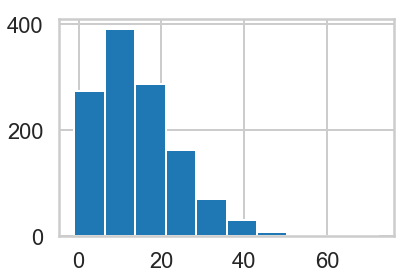

In [23]:
df_new.Achievement_Percentage.hist()

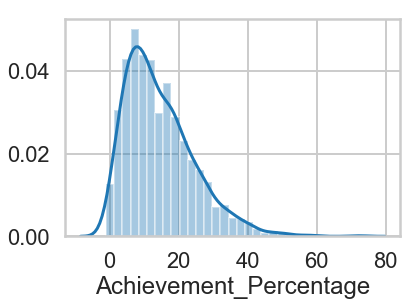

In [25]:
sns.distplot(df_new['Achievement_Percentage'])

In [24]:
df_new.Achievement_Percentage.value_counts()

 15.515471    1
 12.062850    1
 1.669099     1
 15.730081    1
 9.648576     1
 16.458585    1
 27.472635    1
 23.292212    1
 22.472397    1
 11.593482    1
 20.946096    1
 39.783686    1
 1.109691     1
 24.303891    1
 16.736655    1
 18.582899    1
 27.324849    1
 14.230033    1
 26.504115    1
 10.500009    1
 8.823656     1
 24.884206    1
 5.805230     1
 3.980848     1
 24.299717    1
 20.447328    1
 2.362618     1
 14.342477    1
 8.355522     1
 21.584980    1
             ..
 3.998135     1
 5.002068     1
 5.165309     1
 31.197834    1
 26.606091    1
 11.994409    1
 15.866744    1
 7.342812     1
 5.199989     1
 20.042344    1
 22.061805    1
 17.940069    1
 6.144836     1
 6.267163     1
 0.654808     1
 7.658893     1
 20.965027    1
 2.634085     1
 9.069283     1
 26.649871    1
 11.361619    1
 10.129019    1
 11.894160    1
 14.645955    1
 22.955183    1
 20.396253    1
 0.737020     1
 21.328287    1
 4.817696     1
-1.000000     1
Name: Achievement_Percen

In this histogram and distplot, most achievement percentages of those games are between 10-20. Since achievement percentages vary depending on each person's play and save recorded simultaneously, there are no similar achievement percentages.

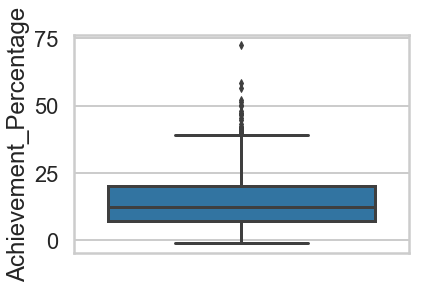

In [28]:
sns.boxplot(df_new.Achievement_Percentage, orient='v')

And in our boxplot on the same feature, it is shown that most of the distribution is on the lower part (our 0 - 25 achevement percentage, with a very distinct outlier that lies on the 75 mark.

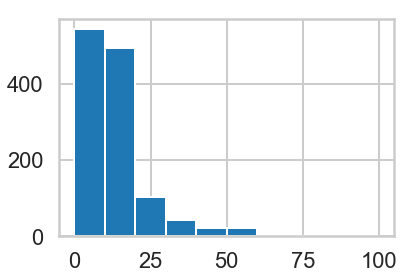

In [23]:
df_new.Price.hist()

In [25]:
df_new.Price.value_counts()

9.99     329
14.99    232
19.99    201
4.99      78
29.99     67
0.00      50
39.99     38
24.99     35
7.99      32
12.99     29
59.99     21
6.99      19
11.99     14
49.99     14
5.99      11
8.99       9
44.99      8
1.99       6
2.99       6
34.99      5
13.99      4
17.99      4
15.99      4
3.99       2
16.99      2
18.99      1
20.99      1
12.89      1
99.99      1
59.95      1
54.99      1
0.99       1
10.99      1
12.00      1
15.00      1
Name: Price, dtype: int64

In terms of the Price, most games cost around 10-20 dollars, with 9.99 as the highest count.

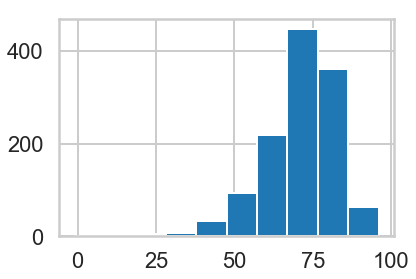

In [24]:
df_new.Rating.hist()

In [26]:
df_new.Rating.value_counts()

 68    59
 73    56
 80    54
 76    53
 72    52
 75    52
 74    51
 77    46
 81    45
 70    44
 83    40
 78    40
 66    38
 82    37
 79    37
 69    34
 65    29
 63    28
 59    26
 71    25
 64    24
 84    24
 61    23
 85    22
 67    21
 62    21
 57    19
 86    17
 58    17
 87    17
       ..
 91     8
 43     6
 47     6
 51     5
 48     5
 45     5
 94     3
 39     3
 40     3
 41     3
 38     2
 32     2
 37     2
 96     2
 44     2
 50     2
 92     2
 93     2
 42     1
 46     1
 95     1
 36     1
 35     1
 33     1
 29     1
 27     1
 24     1
 22     1
 20     1
-1      1
Name: Rating, Length: 70, dtype: int64

In the case of the Ratings of the game, most games are rated 60-80% with most games are rated 68%, making it the highest value among those games.

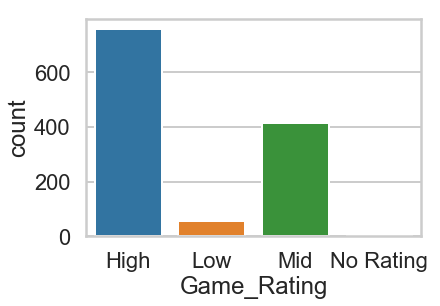

In [26]:
sns.countplot(df_new['Game_Rating'])

In [28]:
df_new.Game_Rating.value_counts()

High         758
Mid          414
Low           57
No Rating      1
Name: Game_Rating, dtype: int64

In our Game_Rating (games rank from Low, Mid, High and those with no rating based from our Rating feature), most of the games were classified as High, which agrees to our Rating analysis earlier.

In [27]:
print("Skewness: %f" % df['Rating'].skew())
print("Kurtosis: %f" % df['Rating'].kurt())

Skewness: -1.035771
Kurtosis: 2.345401


* Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
    * Normal Distribution: = 0
    * Skewed Right: +
    * Skewed Left: -
<br><br>
* Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers 
    * Normal Distribution: = 0
    * Heavy Tailed: +
    * Light Tailed: -
    
<a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm">Further Information</a>

In our dataset, it is shown that its distribution is skewed to the left and is heavy-tailed, which means that our dataset has outliers and leans more to the left.

### Correlation Matrix

One of the Exploratory Data Analysis process was to check the correlation of features to our target feature. Correlation refers to the relation between 2 variables (features). This is very helpful in knowing what factors are most relevant or need in a dataset and gives a glimpse on how connected the features in the dataset were.

We check the correlation of the features by calculating the correlation coefficient, which tells the degree of relationship. It ranges from +1.0 to -1.0. The more higher the coefficient, the more positive the correlation between two variables.. 

In our use case, we have a target feature to be compared to other features in terms of correlation, which is our "Rating" column.

In [30]:
corrmat = df_new.corr()

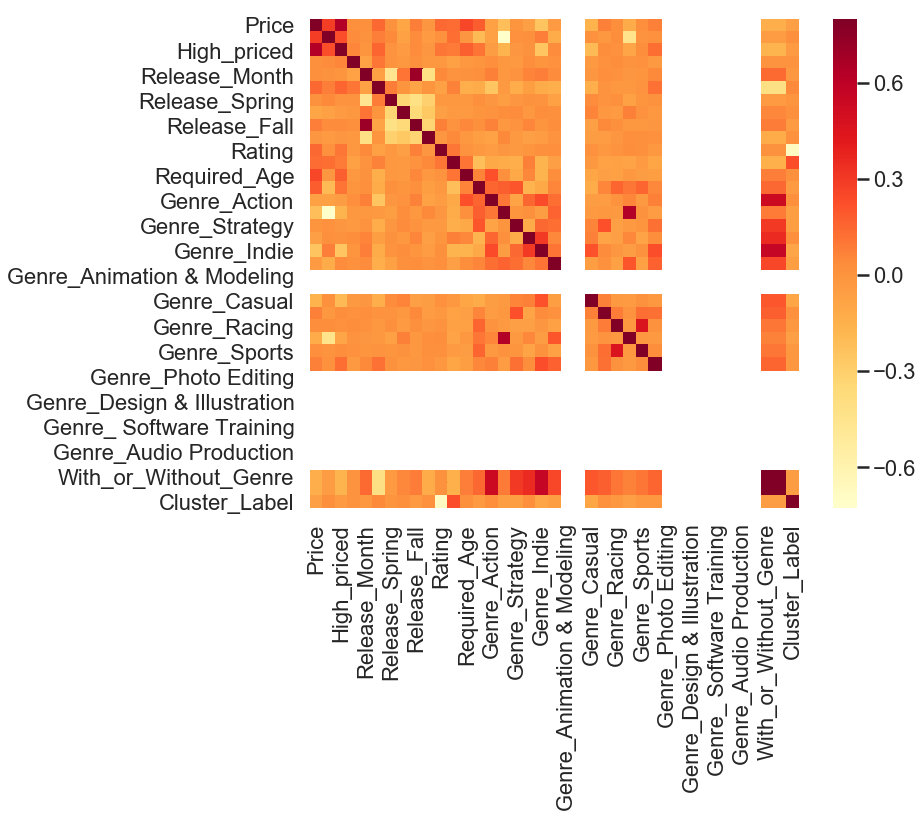

In [31]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlOrRd");

In [32]:
df_new1 =df.copy()

In [33]:
#Removing the features that show no correlation 
df_new2 = df_new1.drop(["Genre_Animation & Modeling", "Genre_Video Production", "Genre_Photo Editing", "Genre_Utilities", "Genre_Design & Illustration", "Genre_Education", "Genre_ Software Training", "Genre_Web Publishing", "Genre_Audio Production", "Genre_Accounting", "Cluster_Label"], axis=1)

In [34]:
df_new2.head()

,Title,Type,Price,Free_or_paid,High_priced,Release_Date,Release_Day,Release_Month,Release_Year,Release_Spring,...,Genre_Casual,Genre_Simulation,Genre_Racing,Genre_Massively Multiplayer,Genre_Sports,Genre_Early Access,With_or_Without_Genre,Entertainment_or_not,Developer,Publisher
App_ID,,,,,,,,,,,,,,,,,,,,,
220,Half-Life 2,game,9.99,1,0,11/16/2004,16,11,2004,0,...,0,0,0,0,0,0,1,1,Valve,Valve
240,Counter-Strike: Source,game,19.99,1,1,11/01/2004,1,11,2004,0,...,0,0,0,0,0,0,1,1,Valve,Valve
300,Day of Defeat: Source,game,9.99,1,0,07/12/2010,12,7,2010,0,...,0,0,0,0,0,0,1,1,Valve,Valve
380,Half-Life 2: Episode One,game,7.99,1,0,06/01/2006,1,6,2006,0,...,0,0,0,0,0,0,1,1,Valve,Valve
400,Portal,game,9.99,1,0,10/10/2007,10,10,2007,0,...,0,0,0,0,0,0,1,1,Valve,Valve


In [35]:
corrmat = df_new2.corr()

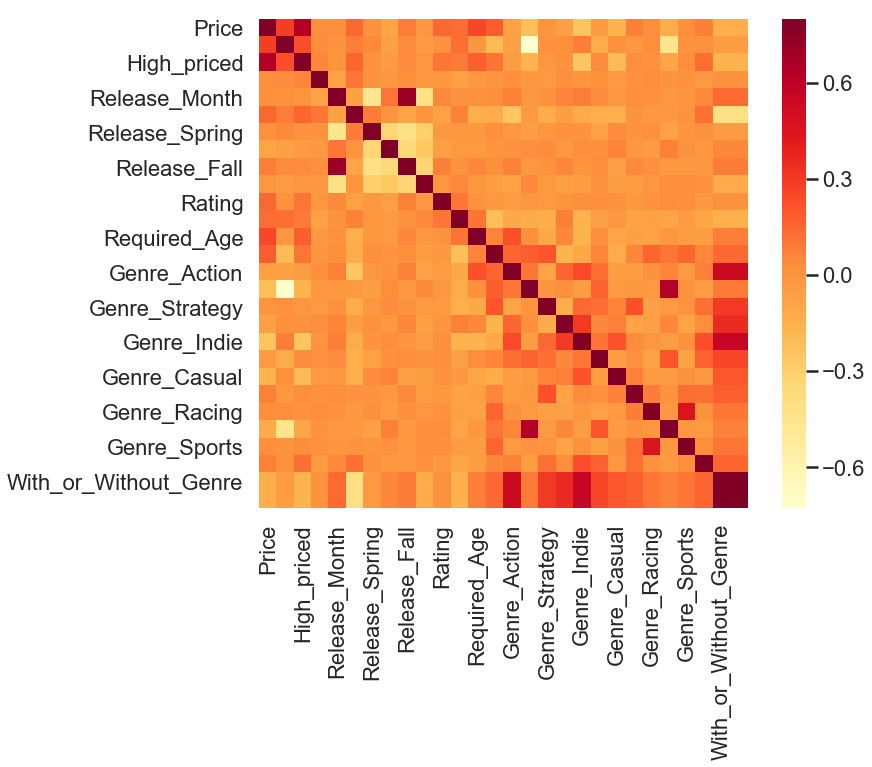

In [36]:
#Creating a correlation heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlOrRd");

For this heatmap, the darker the color red is, the more likely it is correlated.

In [36]:
corrmat

,Price,Free_or_paid,High_priced,Release_Day,Release_Month,Release_Year,Release_Spring,Release_Summer,Release_Fall,Release_Winter,...,Genre_Indie,Genre_RPG,Genre_Casual,Genre_Simulation,Genre_Racing,Genre_Massively Multiplayer,Genre_Sports,Genre_Early Access,With_or_Without_Genre,Entertainment_or_not
Price,1.000000,0.289647,0.640252,0.021730,0.021474,0.146865,0.006441,-0.088680,0.079334,-0.007040,...,-0.238676,-0.029622,-0.160652,0.076119,0.030401,-0.124088,0.027640,0.077470,-0.141098,-0.141098
Free_or_paid,0.289647,1.000000,0.231538,0.040467,0.008024,0.079738,0.045380,-0.059920,0.038957,-0.034176,...,0.082590,-0.116216,0.018166,-0.011741,0.032547,-0.443638,0.004853,0.013767,-0.038288,-0.038288
High_priced,0.640252,0.231538,1.000000,0.057772,-0.003663,0.161012,0.001541,-0.034828,0.038585,-0.010305,...,-0.249263,0.037157,-0.194719,0.031412,0.013203,-0.089822,0.030241,0.129096,-0.163444,-0.163444
Release_Day,0.021730,0.040467,0.057772,1.000000,-0.073288,0.104338,0.005214,-0.012137,0.022758,-0.019752,...,-0.002084,0.015152,-0.029363,0.015783,0.030560,0.004027,0.014635,-0.024811,0.002514,0.002514
Release_Month,0.021474,0.008024,-0.003663,-0.073288,1.000000,-0.068698,-0.462069,0.108229,0.708328,-0.415494,...,0.082461,0.041417,-0.009395,0.027664,0.017527,-0.009235,-0.000758,0.046644,0.141571,0.141571
Release_Year,0.146865,0.079738,0.161012,0.104338,-0.068698,1.000000,0.088031,0.000046,-0.081610,-0.004655,...,-0.113228,-0.132171,-0.134029,0.003244,-0.017808,-0.016296,0.002486,0.115827,-0.407345,-0.407345
Release_Spring,0.006441,0.045380,0.001541,0.005214,-0.462069,0.088031,1.000000,-0.329785,-0.414201,-0.305385,...,0.006120,-0.062614,0.039088,0.003013,0.019206,-0.066724,-0.001039,0.008230,-0.032064,-0.032064
Release_Summer,-0.088680,-0.059920,-0.034828,-0.012137,0.108229,0.000046,-0.329785,1.000000,-0.353242,-0.260440,...,0.032539,0.022644,0.064745,-0.014100,-0.032920,0.072711,0.008209,-0.016560,0.049186,0.049186
Release_Fall,0.079334,0.038957,0.038585,0.022758,0.708328,-0.081610,-0.414201,-0.353242,1.000000,-0.327106,...,0.000139,0.035774,-0.056756,0.043390,0.020339,-0.021635,-0.022208,-0.006921,0.086255,0.086255
Release_Winter,-0.007040,-0.034176,-0.010305,-0.019752,-0.415494,-0.004655,-0.305385,-0.260440,-0.327106,1.000000,...,-0.041140,0.005562,-0.045851,-0.039260,-0.011046,0.024788,0.018486,0.016067,-0.115695,-0.115695


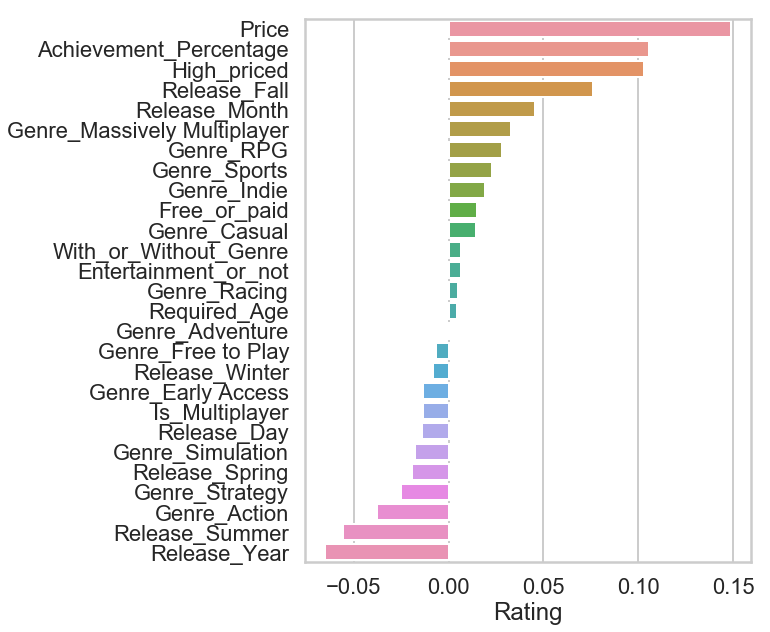

In [37]:
corr = corrmat.sort_values('Rating', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.Rating[1:], corr.index[1:], orient='h')
plt.show()

As you can notice, Price is seen to be highly correlated with the Rating variable, followed by Achievement_Eprcentage, which is by a margin/gap, followed by releases.

In [38]:
#Correlation with output variable
cor_target = abs(corrmat["Rating"])

#Selecting highly correlated features (Anything with a correlation >0.5)
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

Rating    1.0
Name: Rating, dtype: float64

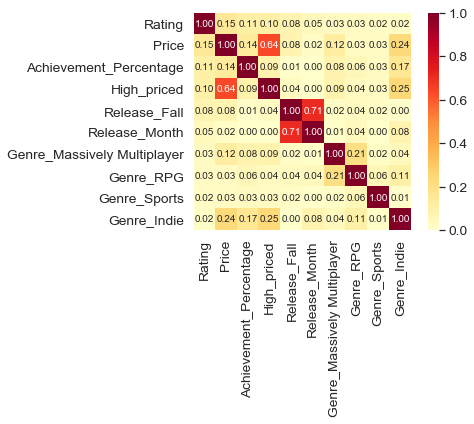

In [39]:
#number of variables for heatmap
k = 10 

cols = corrmat.nlargest(k, 'Rating')['Rating'].index

cm = abs(np.corrcoef(df[cols].values.T))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cmap = 'YlOrRd', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

Assumptions on Initial Analysis:

- *'Price'* is strongly correlated with *'Rating'*. (The higher rating of the game, the more likely it has a price.)
- *'Release_Fall'* is strongly correlated with *'Release_Month'*. (Most games are release on the fall season, which showed a hiher correlation )
- Highly correlated pairs: *'High_Priced and Price with *'Genre_Indie'* 

In [40]:
cols = ['Price', 'Achievement_Percentage']

In [41]:
f = pd.melt(df, id_vars=['Rating'], value_vars=sorted(cols))

In [42]:
f.head()

,Rating,variable,value
0,96,Achievement_Percentage,17.638451
1,88,Achievement_Percentage,16.973004
2,80,Achievement_Percentage,5.954849
3,87,Achievement_Percentage,17.236181
4,90,Achievement_Percentage,22.132841


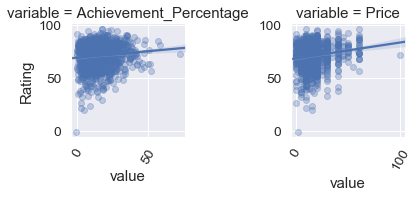

In [43]:
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')

g = g.map(sns.regplot, 'value', 'Rating', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

## Clustering Algorithms

### K-Means
- "K-means clustering is a classification algorithm used to automatically divide a large group(clusters) into smaller groups (clusters), with K as the number of the clusters to be created."
               *eli5 explanation by:yellowjacketcoder*

### Preparing the dataset for Clustering

In [40]:
df_new.head()

,Title,Type,Price,Free_or_paid,High_priced,Release_Date,Release_Day,Release_Month,Release_Year,Release_Spring,...,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Developer,Publisher,Cluster_Label
App_ID,,,,,,,,,,,,,,,,,,,,,
220,Half-Life 2,game,9.99,1,0,11/16/2004,16,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
240,Counter-Strike: Source,game,19.99,1,1,11/01/2004,1,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
300,Day of Defeat: Source,game,9.99,1,0,07/12/2010,12,7,2010,0,...,0,0,0,0,0,1,1,Valve,Valve,0
380,Half-Life 2: Episode One,game,7.99,1,0,06/01/2006,1,6,2006,0,...,0,0,0,0,0,1,1,Valve,Valve,0
400,Portal,game,9.99,1,0,10/10/2007,10,10,2007,0,...,0,0,0,0,0,1,1,Valve,Valve,1


In [41]:
df_a = df_new.drop(["Title","Type","Price", "Free_or_paid", "High_priced", "Release_Date", "Release_Day", "Release_Month", "Release_Year", "Release_Spring", "Release_Summer", "Release_Fall", "Release_Winter", "Game_Rating", "Required_Age", "Is_Multiplayer", "Genre_Action", "Genre_Free to Play", "Genre_Strategy", "Genre_Adventure", "Genre_Indie", "Genre_RPG", "Genre_Animation & Modeling", "Genre_Video Production", "Genre_Casual", "Genre_Simulation", "Genre_Racing", "Genre_Massively Multiplayer", "Genre_Sports", "Genre_Early Access", "Genre_Photo Editing", "Genre_Utilities", "Genre_Design & Illustration", "Genre_Education", "Genre_ Software Training", "Genre_Web Publishing", "Genre_Audio Production", "Genre_Accounting", "With_or_Without_Genre", "Entertainment_or_not", "Cluster_Label", "Developer", "Publisher", "Cluster_Label"], axis=1)

In [88]:
df_a.head()

,Rating,Achievement_Percentage
App_ID,,
220,96,17.638451
240,88,16.973004
300,80,5.954849
380,87,17.236181
400,90,22.132841


In [91]:
#df_1.shape
df_a.shape

(1230, 2)

In [92]:
df_a.dtypes

Rating                      int64
Achievement_Percentage    float64
dtype: object

In [42]:
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)

In [43]:
kmeans.fit(df_a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [ ]:
#kmeans.fit(df_1)

In [44]:
k3_labels = kmeans.labels_

In [45]:
df_k3 = df_a.copy()
df_k3['Cluster_Label'] = k3_labels

In [46]:
df_k3.head()

,Rating,Achievement_Percentage,Cluster_Label
App_ID,,,
220,96,17.638451,2
240,88,16.973004,2
300,80,5.954849,2
380,87,17.236181,2
400,90,22.132841,1


In [98]:
df_k3.Cluster_Label.value_counts()

2    634
0    319
1    277
Name: Cluster_Label, dtype: int64

In [47]:
df_k3[(df_k3.Cluster_Label == 1)].describe()

,Rating,Achievement_Percentage,Cluster_Label
count,277.000000,277.000000,277.0
mean,75.743682,28.526006,1.0
std,7.591662,8.005726,0.0
min,57.000000,18.904260,1.0
25%,70.000000,22.599232,1.0
50%,76.000000,26.606091,1.0
75%,81.000000,32.547008,1.0
max,95.000000,72.417760,1.0


In [48]:
pd.pivot_table(df_k3, index = ['Cluster_Label'], values = ['Rating','Achievement_Percentage'], 
               aggfunc=[np.mean,np.min, np.max])

mean                              amin         \
              Achievement_Percentage     Rating Achievement_Percentage Rating   
Cluster_Label                                                                   
0                          12.177199  56.485893               -1.00000     -1   
1                          28.526006  75.743682               18.90426     57   
2                           9.678650  76.550473                0.00003     66   

                                amax         
              Achievement_Percentage Rating  
Cluster_Label                                
0                          33.358761     67  
1                          72.417760     95  
2                          19.515810     96

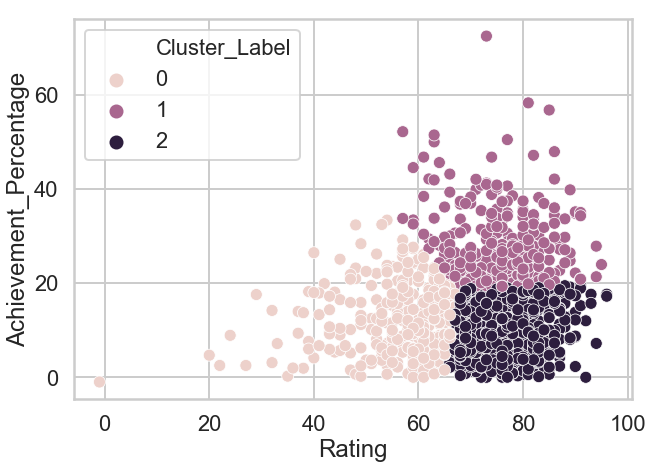

In [49]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3.Rating, y=df_k3.Achievement_Percentage, hue=df_k3.Cluster_Label)

In this plot we can see that 3 clusters visibly distinguishable and easy to read and identify. Note that we could actually narrow down to more numbers of clusters but for this one, we used 3 clusters. <br> To verify if we choose the correct number of our clusters, we could assess it by calculating the Sum of squared errors (SSE) and show the lowest number of k that has the lowest SSE, which shows the number of clusters we most likely to used. It is more commonly known as the Elbow method where when plotted out, it shows the point where the SSE starts to shift below. 

In [50]:
#Set range for K-Clusters
range_n_clusters= [2,3,4,5,6,7,8,9,10]


In [51]:
scores = []

In [52]:
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
    kmeans.fit(df_a)
    score = kmeans.inertia_
    scores.append(score)
    print(str(i) +"\t" +str(score))

2	181868.52257265535
3	117184.76335360712
4	93090.42472782862
5	77790.4439303473
6	63624.84235597984
7	55084.7923594493
8	48506.671890772544
9	42700.900484960875
10	38900.756335141254


Text(0, 0.5, 'Score')

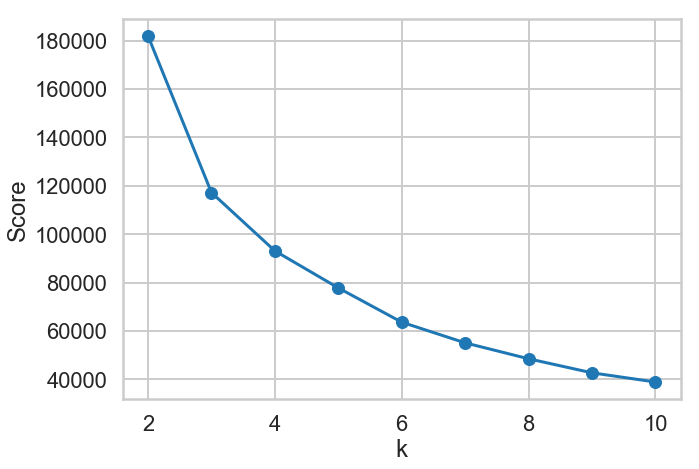

In [53]:
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

### Silhoutte Analysis

#### Silhoutte Analysis is a way to measure how close each point in a cluster is to the points in its neighboring clusters.
● Values lies in the range of [-1, 1]<br>
○ +1: indicates that the sample is far away from its neighboring cluster and very close to the cluster its assigned <br>
○ -1: indicates that the point is close to its neighboring cluster than to the cluster its assigned.<br>
○ 0: means its at the boundary of the distance between the two cluster.<br>
● The higher the value, the better is the cluster configuration. <br>

For n_clusters = 2 The average silhouette_score is : 0.3466789329271721


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 3 The average silhouette_score is : 0.385589299746956


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 4 The average silhouette_score is : 0.3330585048881263


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 5 The average silhouette_score is : 0.3316684490221397


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 6 The average silhouette_score is : 0.3506864894345099


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 7 The average silhouette_score is : 0.33878130978330523


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 8 The average silhouette_score is : 0.3396558926703443


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 9 The average silhouette_score is : 0.3425453073249115


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


For n_clusters = 10 The average silhouette_score is : 0.34200146995208286


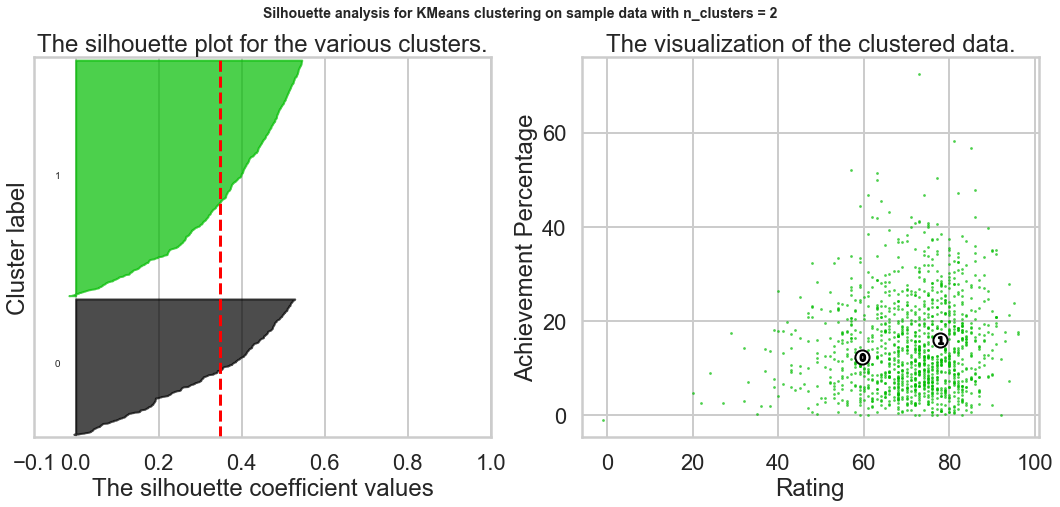

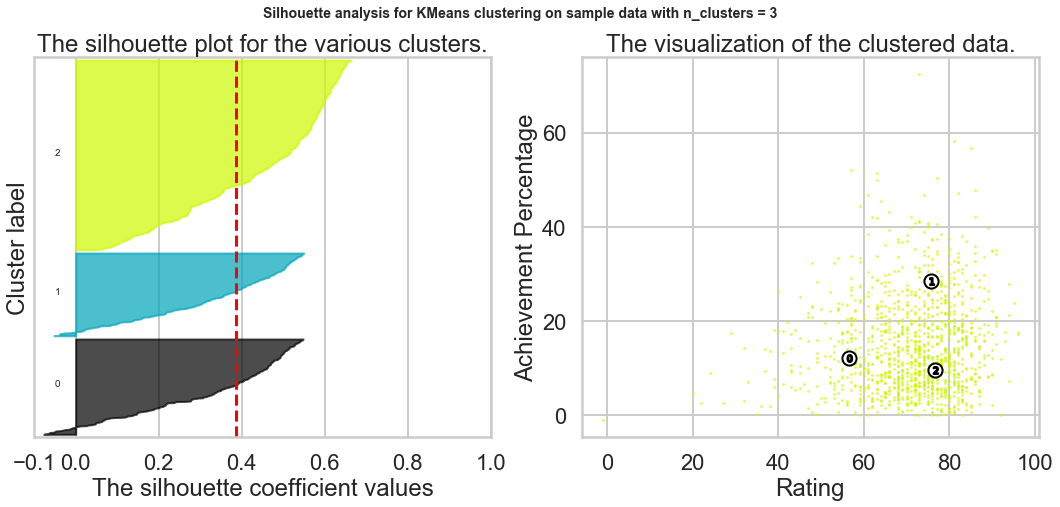

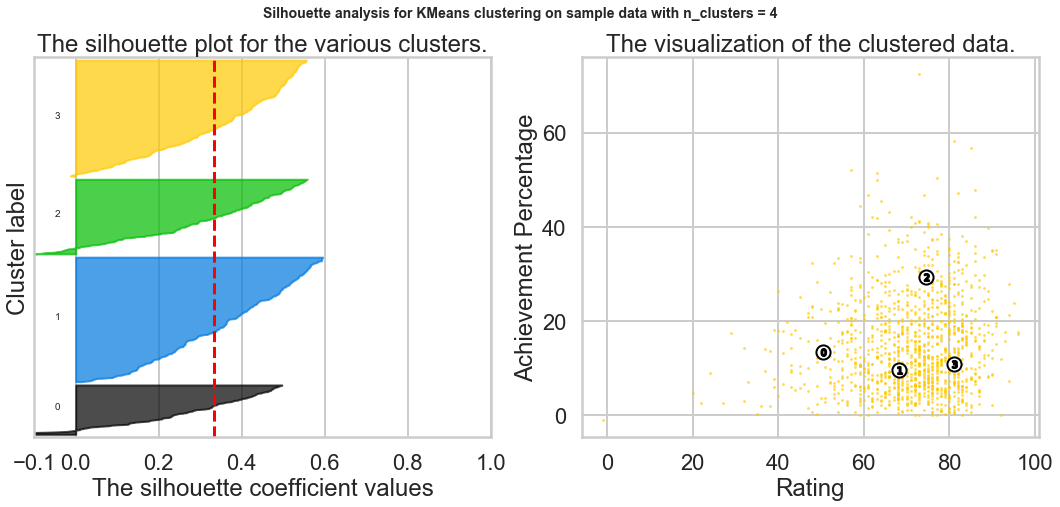

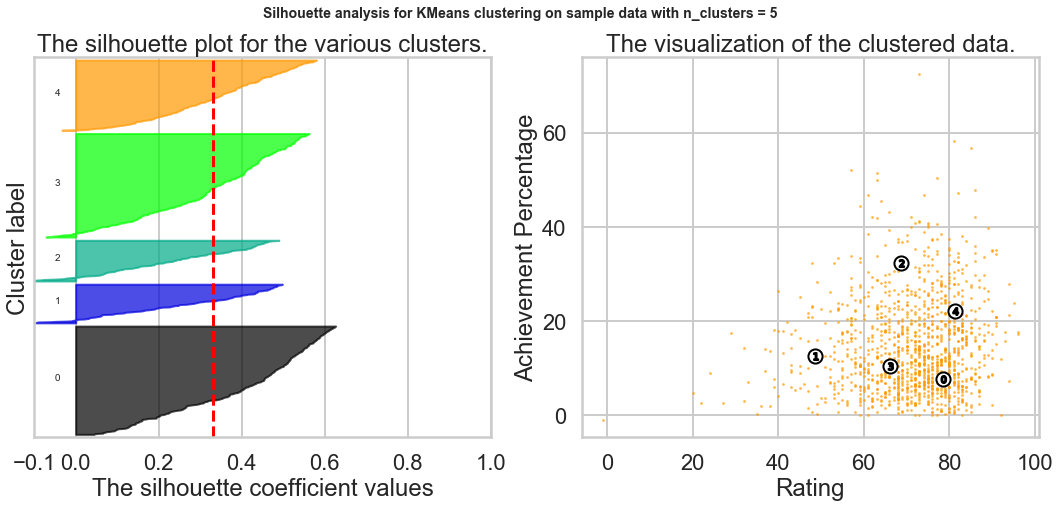

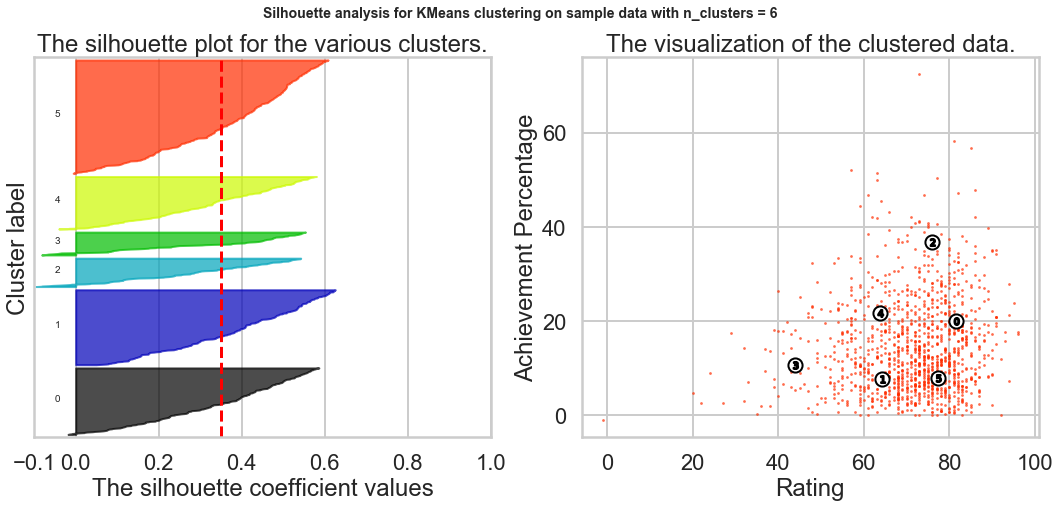

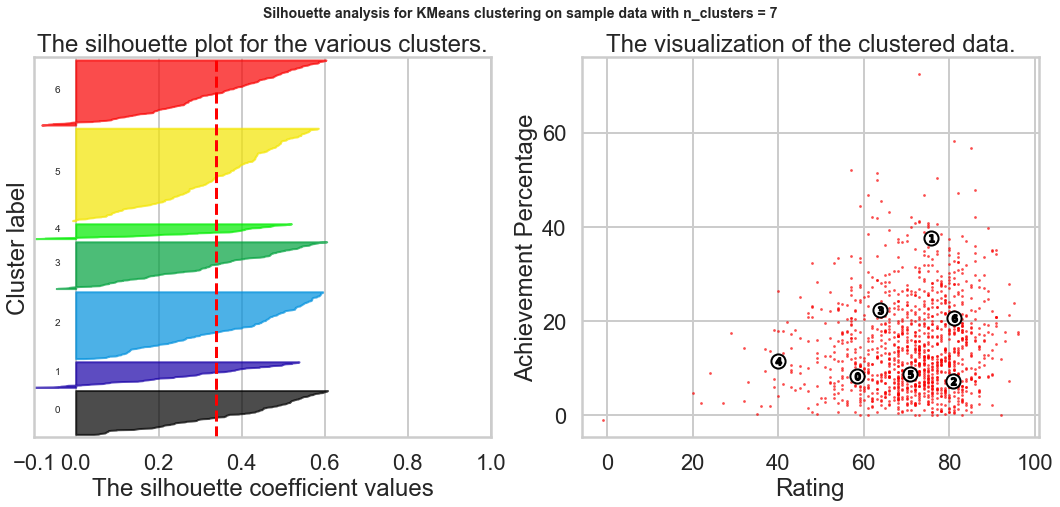

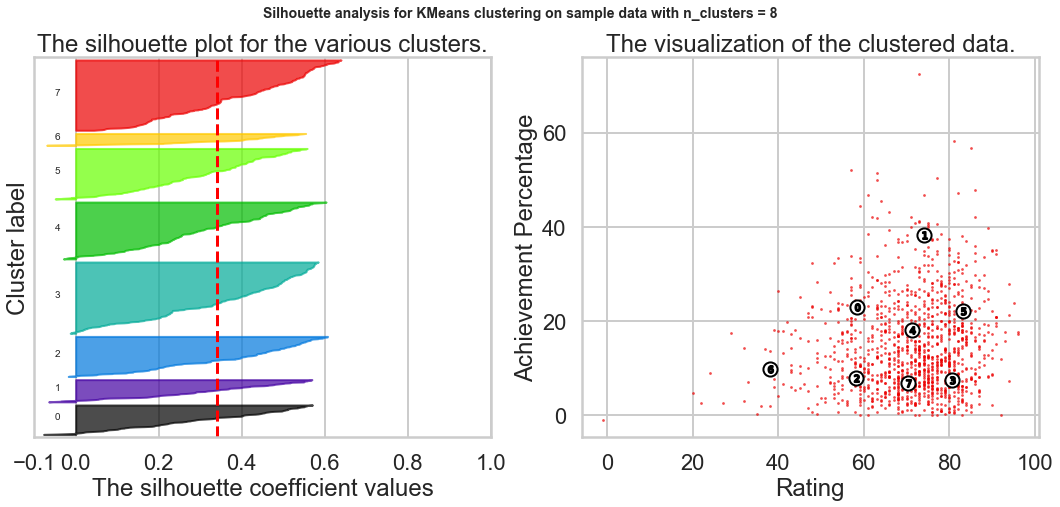

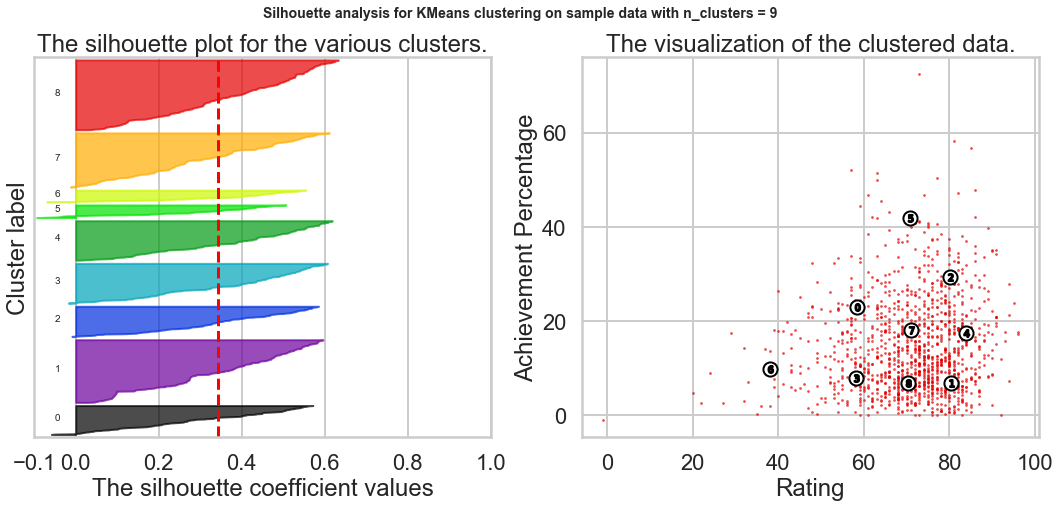

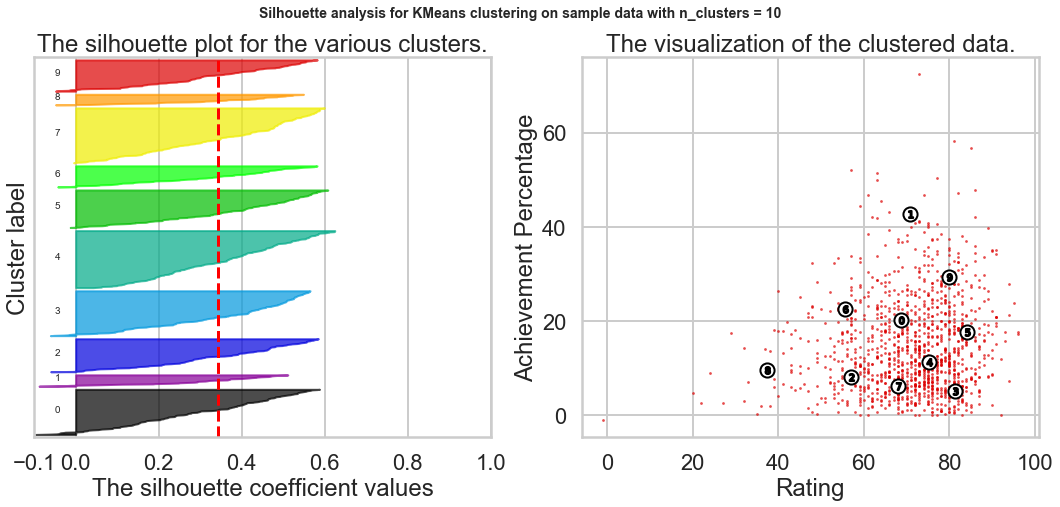

In [58]:

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    
    ### --- ###
    ax1.set_ylim([0, len(df_a) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    ### --- ###
    cluster_labels = clusterer.fit_predict(df_a)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    
    ### --- ###
    silhouette_avg = silhouette_score(df_a, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    ### --- ###
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_a, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values =             sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
    
    ### --- ### 
    ax2.scatter(df_a.Rating, df_a.Achievement_Percentage, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Rating")
    ax2.set_ylabel("Achievement Percentage")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



## Random Forest

Ensemble learning method for classification and regression that operate by constructing a lot of decision trees at training time and outputting the class that is the mode/majority of the classes output by individual trees.

In this dataset, Random Forest Classifier will be used since our dataset has corresponding labels from the clusters we made.

##### Splitting the Dataset with target

In [107]:
df_new.head()

,Title,Type,Price,Free_or_paid,High_priced,Release_Date,Release_Day,Release_Month,Release_Year,Release_Spring,...,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Developer,Publisher,Cluster_Label
App_ID,,,,,,,,,,,,,,,,,,,,,
220,Half-Life 2,game,9.99,1,0,11/16/2004,16,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
240,Counter-Strike: Source,game,19.99,1,1,11/01/2004,1,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
300,Day of Defeat: Source,game,9.99,1,0,07/12/2010,12,7,2010,0,...,0,0,0,0,0,1,1,Valve,Valve,0
380,Half-Life 2: Episode One,game,7.99,1,0,06/01/2006,1,6,2006,0,...,0,0,0,0,0,1,1,Valve,Valve,0
400,Portal,game,9.99,1,0,10/10/2007,10,10,2007,0,...,0,0,0,0,0,1,1,Valve,Valve,1


In [108]:
df_new1 = df_new.drop(["Title","Type","Release_Date","Developer","Publisher", "Game_Rating"], axis=1)

In [109]:
X = df_new1.drop("Achievement_Percentage", axis=1)
y = df_new1.Achievement_Percentage

In [110]:
X.head()

,Price,Free_or_paid,High_priced,Release_Day,Release_Month,Release_Year,Release_Spring,Release_Summer,Release_Fall,Release_Winter,...,Genre_Utilities,Genre_Design & Illustration,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Cluster_Label
App_ID,,,,,,,,,,,,,,,,,,,,,
220,9.99,1,0,16,11,2004,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
240,19.99,1,1,1,11,2004,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
300,9.99,1,0,12,7,2010,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
380,7.99,1,0,1,6,2006,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
400,9.99,1,0,10,10,2007,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1


In [111]:
df_new1.dtypes

Price                          float64
Free_or_paid                     int64
High_priced                      int64
Release_Day                      int64
Release_Month                    int64
Release_Year                     int64
Release_Spring                   int64
Release_Summer                   int64
Release_Fall                     int64
Release_Winter                   int64
Rating                           int64
Achievement_Percentage         float64
Required_Age                     int64
Is_Multiplayer                   int64
Genre_Action                     int64
Genre_Free to Play               int64
Genre_Strategy                   int64
Genre_Adventure                  int64
Genre_Indie                      int64
Genre_RPG                        int64
Genre_Animation & Modeling       int64
Genre_Video Production           int64
Genre_Casual                     int64
Genre_Simulation                 int64
Genre_Racing                     int64
Genre_Massively Multiplay

#### Splitting the Dataset

In [112]:
#75% of the dataset is train_set and the remaining is test_set
df_train, df_test = train_test_split(df_new1, train_size=0.75, random_state=35)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [113]:
#separate the class column of train and test dataset
y_train = df_train["Cluster_Label"]
y_test = df_test["Cluster_Label"]

X_train = df_train.drop(["Cluster_Label"], axis=1)
X_test = df_test.drop(["Cluster_Label"], axis=1)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((922, 38), (308, 38), (922,), (308,))

#### Building the Model

In selecting our attributes, we have to think of the attribute that best separates the given examples or splits. <br>
Two widely used Metrics:<br>
● Gini Index - Identifies which splits create more homogenous subnodes. <br>
● Information Gain / Entropy - A measure to define this degree of disorganization in a system known as Entropy, low entropy means it is easier to describe a node
<br>
In building the model,it is decided that will be feeding the data to 2 models that have 'gini' and 'entropy' as their criterion respectively, to see which of the both gives the best split.

In [115]:
#Instantiate the Algorithm
rf = RandomForestClassifier(criterion="gini", min_samples_split=2, min_samples_leaf=1, max_depth=12, 
                            n_estimators=15, random_state=35) #estimators - trees 

#Fit to the train dataset
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=35, verbose=0, warm_start=False)

In [116]:
rf1 = RandomForestClassifier(criterion="entropy", min_samples_split=2, min_samples_leaf=1, max_depth=12, 
                            n_estimators=15, random_state=35) #estimators - trees 
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=35, verbose=0, warm_start=False)

#### Validating the Model through Metrics

*Insert Explanation*

##### Gini Criterion

In [117]:
predict_test = rf.predict(X_test)

In [118]:
print(confusion_matrix(y_test, predict_test))

[[150   1   0]
 [  1  64   4]
 [  2   1  85]]


##### Entropy Criterion

In [119]:
predict_test_1 = rf1.predict(X_test)

In [120]:
print(confusion_matrix(y_test, predict_test_1))

[[150   1   0]
 [  1  63   5]
 [  4   1  83]]


*Insert Explanation*

#### Accuracy Score
*Insert explanation*

##### Gini Criterion

In [121]:
print(accuracy_score(y_test, predict_test))

0.9707792207792207


##### Entropy Criterion

In [122]:
print(accuracy_score(y_test, predict_test_1))

0.961038961038961


*Insert explanation of the score*

#### Classification Report

*Insert Explanation*

##### Gini Criterion

In [123]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       151
           1       0.97      0.93      0.95        69
           2       0.96      0.97      0.96        88

   micro avg       0.97      0.97      0.97       308
   macro avg       0.97      0.96      0.97       308
weighted avg       0.97      0.97      0.97       308



##### Entropy Criterion

In [124]:
print(classification_report(y_test, predict_test_1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.97      0.91      0.94        69
           2       0.94      0.94      0.94        88

   micro avg       0.96      0.96      0.96       308
   macro avg       0.96      0.95      0.95       308
weighted avg       0.96      0.96      0.96       308



*Insert Explanation*

In [125]:
#copy the dataset to preserve the orginal class of the test dataset
df_predicted_set = df_test.copy()

df_predicted_set["class_predicted_gini"] = predict_test #putting answers 

df_predicted_set["class_predicted_entropy"] = predict_test_1 #putting answers 

In [126]:
df_predicted_set.head()

,Price,Free_or_paid,High_priced,Release_Day,Release_Month,Release_Year,Release_Spring,Release_Summer,Release_Fall,Release_Winter,...,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Cluster_Label,class_predicted_gini,class_predicted_entropy
App_ID,,,,,,,,,,,,,,,,,,,,,
219830,9.99,1,0,5,11,2013,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
19030,14.99,1,1,11,5,2010,1,0,0,0,...,0,0,0,0,0,1,1,2,2,2
310080,9.99,1,0,4,9,2014,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
227020,24.99,1,1,27,9,2013,0,0,1,0,...,0,0,0,0,0,1,1,2,0,0
287260,14.99,1,1,11,11,2014,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1


In [127]:
df['Cluster_Label'].value_counts()

0    635
2    319
1    276
Name: Cluster_Label, dtype: int64

In [128]:
df_predicted_set['class_predicted_gini'].value_counts()

0    153
2     89
1     66
Name: class_predicted_gini, dtype: int64

In [129]:
df_predicted_set['class_predicted_entropy'].value_counts()

0    155
2     88
1     65
Name: class_predicted_entropy, dtype: int64

## Feature Importance
For evaluating the importance of features on classification task. What features contribute the most in your decision tree classifier / validation

In [135]:
rf_feat_imp = rf.feature_importances_ 

feature_importance = pd.DataFrame(rf_feat_imp, index=X_train.columns, columns=["Feat_Imp"])

In [136]:
#Sort in descending order to get Most Important to Least Important
feature_importance.sort_values("Feat_Imp",ascending=False)

,Feat_Imp
Rating,0.361229
Achievement_Percentage,0.353834
Release_Day,0.053523
Price,0.037479
Release_Year,0.028019
Release_Month,0.027512
Is_Multiplayer,0.013081
Required_Age,0.012256
Genre_Adventure,0.011443
Genre_Indie,0.010416


*Insert Explanation*

## Clustering Analysis 

*Insert explanation but for Analysis, Refer to the Data visualization done in Power BI*
(but also do this in seaborn and matplotlib)


In [137]:
df_new.head()

,Title,Type,Price,Free_or_paid,High_priced,Release_Date,Release_Day,Release_Month,Release_Year,Release_Spring,...,Genre_Education,Genre_ Software Training,Genre_Web Publishing,Genre_Audio Production,Genre_Accounting,With_or_Without_Genre,Entertainment_or_not,Developer,Publisher,Cluster_Label
App_ID,,,,,,,,,,,,,,,,,,,,,
220,Half-Life 2,game,9.99,1,0,11/16/2004,16,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
240,Counter-Strike: Source,game,19.99,1,1,11/01/2004,1,11,2004,0,...,0,0,0,0,0,1,1,Valve,Valve,0
300,Day of Defeat: Source,game,9.99,1,0,07/12/2010,12,7,2010,0,...,0,0,0,0,0,1,1,Valve,Valve,0
380,Half-Life 2: Episode One,game,7.99,1,0,06/01/2006,1,6,2006,0,...,0,0,0,0,0,1,1,Valve,Valve,0
400,Portal,game,9.99,1,0,10/10/2007,10,10,2007,0,...,0,0,0,0,0,1,1,Valve,Valve,1
